# Linear regression from Scratch

This notebook contains the code for creating a Linear Regression algorithm from scratch in Python and creating a Linear Regression dataset. 

### Creating the Dataset

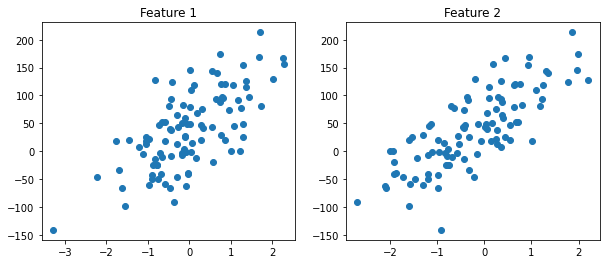

In [76]:
import sklearn.datasets as datasets
import matplotlib.pyplot as plt

x, y = datasets.make_regression( n_samples= 100, n_features= 2, noise= 5, bias= 50)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(x[:, 0],y)
plt.title("Feature 1")
plt.subplot(1,2,2)
plt.scatter(x[:, 1],y)
plt.title("Feature 2")
plt.show()

### Code for Linear Regression

In [77]:
import numpy as np

class LinearRegression:
    def __init__(self, learning_rate=0.01, n_iter=1000):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.weights = None
        self.bias = None
        self.cost_history = None

    def __hypothesis__(self, x):
        return x.dot(self.weights) + self.bias

    def __cost__(self, x, y):
        return ((self.__hypothesis__(x) - y)**2).sum() / (2 * len(x))

    def fit(self, x, y):
        self.weights = np.ones(x.shape[1])
        self.bias = 0
        self.cost_history = []

        for _ in range(self.n_iter):
            y_pred = self.__hypothesis__(x)
            self.weights -=  self.learning_rate*(y_pred - y).dot(x)/x.shape[0]
            self.bias -= (y_pred - y).sum()/x.shape[0]
            self.cost_history.append(self.__cost__(x, y))

    def predict(self, x):
        return self.__hypothesis__(x)

### Training a model using the Dataset

The coefficients are [19.825529   34.20661672] and the bias is 50.39593195893394


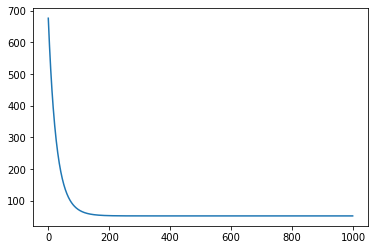

In [7]:
lr = LinearRegression(0.02, 1000)
lr.fit(x, y)
print(f"The coefficients are {lr.weights} and the bias is {lr.bias}")
plt.plot(lr.cost_history)
plt.show()

10 random rows is selected from the dataset for making the predictions and looking at the scatter plot it can be seen that the predictions are close to the true value showing that our model works. 

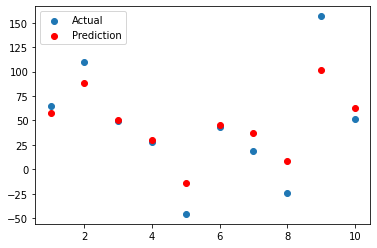

In [79]:
#10 random row indexes from x
rows = np.random.randint(0, len(x), 10)
x_ax = np.linspace(1, 10, 10)

plt.scatter( x_ax,y[rows])
plt.scatter(x_ax, lr.predict(x[rows]), color = 'r')
plt.legend(['Actual', 'Prediction'])
plt.show()